In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


df_listing = pd.read_csv("../../raw_data/sfo/listings-1.csv")
df_transit = pd.read_csv("data/sfo_distance.csv")

#### Check imported data

In [2]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.91
1,5858,https://www.airbnb.com/rooms/5858,20200815122856,2020-08-15,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.81
2,7918,https://www.airbnb.com/rooms/7918,20200815122856,2020-08-15,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,9.0,9.0,8.0,NaN,f,9,0,9,0,0.14
3,8142,https://www.airbnb.com/rooms/8142,20200815122856,2020-08-15,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,10.0,9.0,9.0,NaN,f,9,0,9,0,0.11
4,8339,https://www.airbnb.com/rooms/8339,20200815122856,2020-08-15,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,10.0,10.0,10.0,STR-0000264,f,2,2,0,0,0.21


#### Merge Dataset and fix data type

In [12]:
df = pd.merge(df_transit, df_listing, on="id")
df["price"] = df.price.str.replace('$','')
df["price"].replace(',','', regex=True, inplace=True)
df["price"] = df["price"].astype(float)

#### Create a base visualization

In [13]:
df_filtered = df_filtered[(df["property_type"] == "Entire apartment")&(df["distance"] < 2000)&(df["price"]<150)]
df_filtered = df_filtered[(df_filtered["accommodates"] > 2)]
df_filtered.head()

# for x in plotdata["neighbourhood_cleansed"].unique():
#     temp = plotdata[plotdata["neighbourhood_cleansed"] == x]
#     sns.relplot(data=temp, x="price", y="distance")


<ipython-input-13-09b5cdcf0e99>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df["property_type"] == "Entire apartment")&(df["distance"] < 2000)&(df["price"]<150)]


,id,distance,duration,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,14,3,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.91
16,18231,257,52,https://www.airbnb.com/rooms/18231,20200815122856,2020-08-15,Loft-like Apt./Garden (monthly only available),<b>The space</b><br />Located on 26th St. in w...,We love Noe Valley. It is a wonderful friendly...,https://a0.muscache.com/pictures/145020/505b89...,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.51
50,53934,316,92,https://www.airbnb.com/rooms/53934,20200815122856,2020-08-15,"Urban Rainbow: Artsy, Downtown Condo",Our San Frantastic rainbow of a home is the ul...,Our hip Lower Nob Hill condo is centrally loca...,https://a0.muscache.com/pictures/314563/4ff783...,...,10.0,9.0,9.0,0000071,f,1,1,0,0,1.95
53,55632,117,34,https://www.airbnb.com/rooms/55632,20200815122856,2020-08-15,"❤️Stunning Luxury Apt, 5 star reviews, Laundry,","Recently Remodeled, all new appliances, new wa...",The neighborhood: Richmond/SeaCliff <br />The ...,https://a0.muscache.com/pictures/cd43f52e-8406...,...,10.0,9.0,10.0,NaN,f,2,2,0,0,0.09
54,55636,19,3,https://www.airbnb.com/rooms/55636,20200815122856,2020-08-15,"❤️ Super luxury Apt, Great View, 5 Star Reviews",Twin Peaks has the best view in the whole city...,Lots of free street parking directly outside t...,https://a0.muscache.com/pictures/0e51a14c-979a...,...,10.0,9.0,9.0,NaN,f,2,2,0,0,0.23


#### Convert Categorical to number

In [62]:
df["neighbourhood_cleansed"] = df["neighbourhood_cleansed"].astype('category')
df["neighbourhood_cat"] = df["neighbourhood_cleansed"].cat.codes

df["property_type"] = df["property_type"].astype('category')
df["property_type_cat"] = df["property_type"].cat.codes

df.head()

,id,distance,duration,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_cat,property_type_cat
0,958,14,3,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,...,10.0,STR-0001256,f,1,1,0,0,1.91,36,3
1,5858,366,91,https://www.airbnb.com/rooms/5858,20200815122856,2020-08-15,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,...,9.0,NaN,f,1,1,0,0,0.81,1,3
2,7918,45,8,https://www.airbnb.com/rooms/7918,20200815122856,2020-08-15,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,...,8.0,NaN,f,9,0,9,0,0.14,11,19
3,8142,45,8,https://www.airbnb.com/rooms/8142,20200815122856,2020-08-15,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,...,9.0,NaN,f,9,0,9,0,0.11,11,19
4,8339,102,27,https://www.airbnb.com/rooms/8339,20200815122856,2020-08-15,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,...,10.0,STR-0000264,f,2,2,0,0,0.21,36,6


In [16]:
df_filtered = df[["distance", "duration", "price", "accommodates", "neighbourhood_cat", "property_type"]]
df_filtered.head()

,distance,duration,price,accommodates,neighbourhood_cat,property_type
0,14,3,132.0,3,36,Entire apartment
1,366,91,235.0,5,1,Entire apartment
2,45,8,56.0,2,11,Private room in apartment
3,45,8,56.0,2,11,Private room in apartment
4,102,27,750.0,4,36,Entire condominium


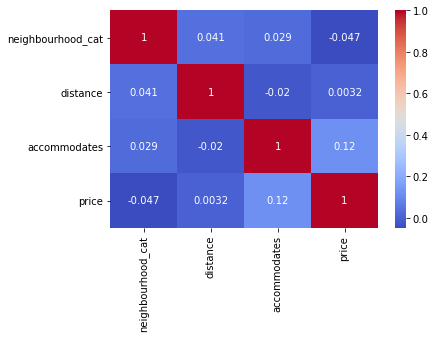

In [17]:
# calculate corr
corr = df[['neighbourhood_cat', 'distance', 'accommodates', 'price']].corr()

sns.heatmap(corr, annot = True, cmap='coolwarm')

#### MLR

In [18]:

X = df[['neighbourhood_cat', 'distance', 'accommodates']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test) 

print("RMSE:", (np.sqrt(mean_squared_error(y_test, Y_pred))))
print("R2:", r2_score(y_test, Y_pred))
print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)

RMSE: 861.7877443141367
R2: 0.0063074489509911125
Intercept: 84.71532644519468
Coefficients: [-2.03706917e+00  9.03916636e-03  5.59779748e+01]


#### Split Data

In [22]:
Y = df_filtered["price"].values.reshape(-1, 1)
X = df_filtered["distance"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)

#### LinearRegression

In [23]:
regr = LinearRegression()  # create object for the class
regr.fit(X_train, y_train) # perform linear regression
Y_pred = regr.predict(X_test)  # make predictions

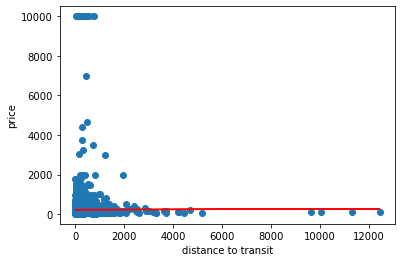

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test, Y_pred, color='red')
plt.xlabel('distance to transit')
plt.ylabel('price')
plt.show()

#### Regression Values

In [25]:

# The coefficients
print('Coefficients:', regr.coef_[0][0])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: 0.003939810412626986
Mean squared error: 750273.80
Coefficient of determination: -0.00


#### LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.metrics import accuracy_score

lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(df_filtered["price"])
X = lab_enc.fit_transform(df_filtered["distance"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)


# Train model
clf_lg = LogisticRegression()  
clf_lg.fit(X_train, y_train)

lg_predictions = clf_lg.predict(X_test)
lg_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lg_predictions})
lg_results_df.sample(10)

/Users/Ansley/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
1030,61,289
221,10,172
1174,10,172
782,127,172
1307,319,172
3035,82,172
2208,176,172
2385,50,172
2805,120,172
2227,289,172


In [30]:
# Accuracy
lg_accuracy = accuracy_score(y_test,lg_predictions)
print("Accuracy:", lg_accuracy)

Accuracy: 0.02017543859649123


#### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(df["price"])
X = df[['neighbourhood_cat', 'distance', 'accommodates']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1234)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:',accuracy_score(y_test,knn.predict(X_test)))

Train accuracy score: 0.201364522417154
Test accuracy score: 0.019883040935672516


#### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(df["price"])
X = df[['neighbourhood_cat', 'distance', 'accommodates', 'property_type_cat', ]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1234)

rfc_b = RFC()

rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(X_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').